### LE QUERNEC Loévan, MARTIN Santiago, NAGY Bertand, DIA5

# Python for data analysis: project

In [122]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Data pre-processing

### import the data

In [123]:
# create the dataframe
df = pd.read_csv('online_news_popularity.csv')

# set max rows to display
pd.set_option('display.max_rows', None)

# set max columns to display
pd.set_option('display.max_columns', None)

# show the first 5 rows
df.head()

url   timedelta   
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0  \
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words   
0             12.0              219.0          0.663594                1.0  \
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs   
0                   0.815385         4.0              2.0        1.0  \
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   

    num_videos   average_token_length   num_keywords   
0          0.0               4.680365            5.0  \
1          0.0               4.913725            4.0   
2          0.0               4.393365            6.0   
3          0.0               4.404896            7.0   
4          0.0               4.682836            7.0   

    data_channel_is_lifestyle   data_channel_is_entertainment   
0                         0.0                             1.0  \
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         0.0                             1.0   
4                         0.0                             0.0   

    data_channel_is_bus   data_channel_is_socmed   data_channel_is_tech   
0                   0.0                      0.0                    0.0  \
1                   1.0                      0.0                    0.0   
2                   1.0                      0.0                    0.0   
3                   0.0                      0.0                    0.0   
4                   0.0                      0.0                    1.0   

    data_channel_is_world   kw_min_min   kw_max_min   kw_avg_min   kw_min_max   
0                     0.0          0.0          0.0          0.0          0.0  \
1                     0.0          0.0          0.0          0.0          0.0   
2                     0.0          0.0          0.0          0.0          0.0   
3                     0.0          0.0          0.0          0.0          0.0   
4                     0.0          0.0          0.0          0.0          0.0   

    kw_max_max   kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg   
0          0.0          0.0          0.0          0.0          0.0  \
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

    self_reference_min_shares   self_reference_max_shares   
0                       496.0                       496.0  \
1                         0.0                         0.0   
2                       918.0                       918.0   
3                         0.0                         0.0   
4                       545.0                     16000.0   

    self_reference_avg_sharess   weekday_is_monday   weekday_is_tuesday   
0                   496.000000                 1.0                  0.0  \
1                     0.000000                 1.0                  0.0   
2                   918.000000                 1.0         

### some statistics

In [124]:
# shape of the dataframe
rows, columns = df.shape
print("Number of rows: ", rows)
print("Number of columns: ", columns)

Number of rows:  39644
Number of columns:  61


In [125]:
# types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [126]:
# descibe the dataframe
df.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens   
count  39644.000000     39644.000000       39644.000000      39644.000000  \
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs   
count       39644.000000               39644.000000  39644.000000  \
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos   average_token_length   
count     39644.000000  39644.000000  39644.000000           39644.000000  \
mean          3.293638      4.544143      1.249874               4.548239   
std           3.855141      8.309434      4.107855               0.844406   
min           0.000000      0.000000      0.000000               0.000000   
25%           1.000000      1.000000      0.000000               4.478404   
50%           3.000000      1.000000      0.000000               4.664082   
75%           4.000000      4.000000      1.000000               4.854839   
max         116.000000    128.000000     91.000000               8.041534   

        num_keywords   data_channel_is_lifestyle   
count   39644.000000                39644.000000  \
mean        7.223767                    0.052946   
std         1.909130                    0.223929   
min         1.000000                    0.000000   
25%         6.000000                    0.000000   
50%         7.000000                    0.000000   
75%         9.000000                    0.000000   
max        10.000000                    1.000000   

        data_channel_is_entertainment   data_channel_is_bus   
count                    39644.000000          39644.000000  \
mean                         0.178009              0.157855   
std                          0.382525              0.364610   
min                          0.000000              0.000000   
25%                          0.000000              0.000000   
50%                          0.000000              0.000000   
75%                          0.000000              0.000000   
max                          1.000000              1.000000   

        data_channel_is_socmed   data_channel_is_tech   data_channel_is_world   
count             39644.000000           39644.000000            39644.000000  \
mean                  0.058597               0.185299                0.212567   
std                   0.234871               0.388545                0.409129   
min                   0.000000               0.000000                0.000000   
25%                   0.000000               0.000000                0.000000   
50%                   0.000000               0.000000                0.000000   
75%                   0.000000               0.000000                0.000000   
max                   1.000000               1.000000                1.000000   

         kw_min_min     kw_max_min    kw_avg_min     kw_min_max   
count  39644.000000   39644.000000  39644.000000   39644.000000  \
mean      26.106801    1153.951682    312.366967   13612.354102   
std       69.633215    3857.9908

In [127]:
# check for missing values
print(df.isnull().sum())

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

Here, we can see that we don't have any missing values in our dataset. So, let's continue with the data cleaning.

In [128]:
# set 10 rows to display
pd.set_option('display.max_rows', 10)

### drop rows

Let's see if some data doesn't make sense at all. Are the articles with 0 words or no title really articles?

In [129]:
# show the rows with ' n_tokens_title' == 0 or ' n_tokens_content' == 0
df.loc[(df[' n_tokens_title'] == 0) | (df[' n_tokens_content'] == 0)]

url   timedelta   
893    http://mashable.com/2013/01/23/actual-facebook...       715.0  \
917    http://mashable.com/2013/01/23/fitness-gadget-...       715.0   
1062   http://mashable.com/2013/01/25/data-vs-nature-...       713.0   
1121   http://mashable.com/2013/01/26/infographics-ma...       712.0   
1312   http://mashable.com/2013/01/29/social-tv-chart...       709.0   
...                                                  ...         ...   
39598  http://mashable.com/2014/12/26/holiday-decorat...         9.0   
39601  http://mashable.com/2014/12/26/minority-author...         9.0   
39613  http://mashable.com/2014/12/26/the-interview-b...         9.0   
39615  http://mashable.com/2014/12/26/toothpaste-fluo...         9.0   
39616  http://mashable.com/2014/12/26/top-photography...         9.0   

        n_tokens_title   n_tokens_content   n_unique_tokens   
893               10.0                0.0               0.0  \
917                8.0                0.0               0.0   
1062              12.0                0.0               0.0   
1121              10.0                0.0               0.0   
1312              14.0                0.0               0.0   
...                ...                ...               ...   
39598             11.0                0.0               0.0   
39601             12.0                0.0               0.0   
39613             12.0                0.0               0.0   
39615             11.0                0.0               0.0   
39616             15.0                0.0               0.0   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs   
893                  0.0                        0.0         0.0  \
917                  0.0                        0.0         0.0   
1062                 0.0                        0.0         0.0   
1121                 0.0                        0.0         0.0   
1312                 0.0                        0.0         0.0   
...                  ...                        ...         ...   
39598                0.0                        0.0         0.0   
39601                0.0                        0.0         0.0   
39613                0.0                        0.0         0.0   
39615                0.0                        0.0         0.0   
39616                0.0                        0.0         0.0   

        num_self_hrefs   num_imgs   num_videos   average_token_length   
893                0.0       10.0          0.0                    0.0  \
917                0.0        0.0          0.0                    0.0   
1062               0.0        0.0          0.0                    0.0   
1121               0.0        0.0          0.0                    0.0   
1312               0.0        0.0          0.0                    0.0   
...                ...        ...          ...                    ...   
39598              0.0        0.0          1.0                    0.0   
39601              0.0        0.0          1.0                    0.0   
39613              0.0       14.0          0.0                    0.0   
39615              0.0       21.0          1.0                    0.0   
39616              0.0        0.0          1.0                    0.0   

        num_keywords   data_channel_is_lifestyle   
893              7.0                         0.0  \
917             10.0                         1.0   
1062             9.0                         0.0   
1121             7.0                         0.0   
1312            10.0                         0.0   
...              ...                         ...   
39598            6.0                         0.0   
39601            7.0                         0.0   
39613           10.0                         0.0   
39615           10.0                         0.0   
39616            6.0                         0.0   

        data_channel_is_entertainment   data_channel_is_bus   
893                               0.0                   0.0  

In [130]:
# create a mask where either ' n_tokens_title' or ' n_tokens_content' is 0 and other 3 columns are 0 (link/image/video)
mask = (df[' n_tokens_title'] == 0) | (df[' n_tokens_content'] == 0) & ((df[' num_hrefs'] == 0) & (df[' num_imgs'] == 0) & (df[' num_videos'] == 0))

# use the mask to drop the rows
df = df[~mask]

What we have done so far here:
- identify articles with no title or no words;
- created a mask to select the rows with no title or no words and no link(s)/image(s)/video(s) (some articles can only have a link, an image or a video);
- drop these rows.

### drop columns

We drop the first two columns, `url` and ` timedelta`. The first one is the link to the article, and the second one is the time between the article publication and the dataset acquisition. These two columns are not useful for our analysis.

In [131]:
# drop the first two columns
df.drop(columns=['url', ' timedelta'], inplace=True) # beware of the space in some column names

### format column names

In our dataset, we have some columns with spaces at the begginning of their names. We remove these spaces.

In [132]:
# rename the columns
for col in df.columns:
    df.rename(columns={col: col.strip()}, inplace=True)

# check the columns
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

### correlation between `is_saturday`, `is_sunday` and `is_weekend`

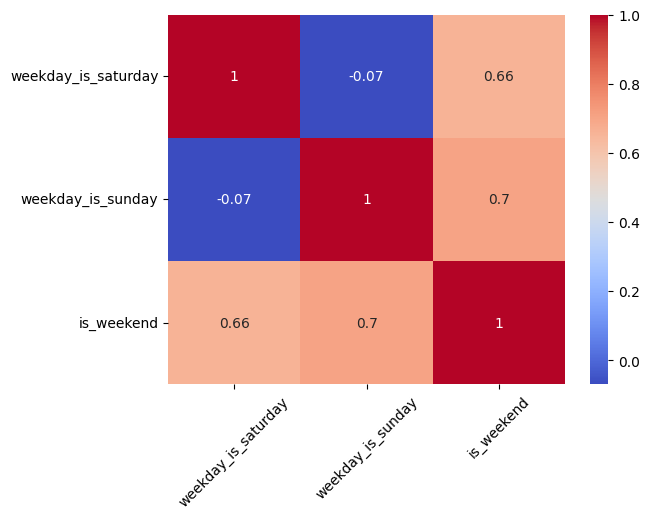

(None,)

In [133]:
# show correlation matrix between days
sns.heatmap(df[['weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']].corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show(), 

Here, we obviously found that the correlation between `weekday_is_saturday`/`weekday_is_sunday` and `is_weekend` is high because when it's the weekend, it's either saturday or sunday. We think that the column `is_weekend` is not necessary.

In [134]:
# drop the column ' is_weekend'
df.drop(columns=['is_weekend'], inplace=True)

### a quick recap

What we have done so far:
- import the data;
- showed some statistics of the dataset;
- renamed the columns;
- dropped some rows that don't make sense (no title, no words and no link(s)/image(s)/video(s));
- dropped columns 'url', 'timedelta', 'is_weekend'.

What we are going to do:
- the data visualization;
- the modeling (using machine learning, then deep learning);
- the Flask API.

## Data visualization

### is there more or less shares on any day?

In [135]:
# new column 'Day' using one-hot encoded columns 'weekday_is_ ...'
def to_day(row):
    if row['weekday_is_monday'] == 1:
        return 'Monday'
    elif row['weekday_is_tuesday'] == 1:
        return 'Tuesday'
    elif row['weekday_is_wednesday'] == 1:
        return 'Wednesday'
    elif row['weekday_is_thursday'] == 1:
        return 'Thursday'
    elif row['weekday_is_friday'] == 1:
        return 'Friday'
    elif row['weekday_is_saturday'] == 1:
        return 'Saturday'
    elif row['weekday_is_sunday'] == 1:
        return 'Sunday'
    else:
        return 'No day'

df['Day'] = df.apply(to_day, axis=1)

df.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words   
0            12.0             219.0         0.663594               1.0  \
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos   
0                  0.815385        4.0             2.0       1.0         0.0  \
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  num_keywords  data_channel_is_lifestyle   
0              4.680365           5.0                        0.0  \
1              4.913725           4.0                        0.0   
2              4.393365           6.0                        0.0   
3              4.404896           7.0                        0.0   
4              4.682836           7.0                        0.0   

   data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed   
0                            1.0                  0.0                     0.0  \
1                            0.0                  1.0                     0.0   
2                            0.0                  1.0                     0.0   
3                            1.0                  0.0                     0.0   
4                            0.0                  0.0                     0.0   

   data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min   
0                   0.0                    0.0         0.0         0.0  \
1                   0.0                    0.0         0.0         0.0   
2                   0.0                    0.0         0.0         0.0   
3                   0.0                    0.0         0.0         0.0   
4                   1.0                    0.0         0.0         0.0   

   kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg   
0         0.0         0.0         0.0         0.0         0.0         0.0  \
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   kw_avg_avg  self_reference_min_shares  self_reference_max_shares   
0         0.0                      496.0                      496.0  \
1         0.0                        0.0                        0.0   
2         0.0                      918.0                      918.0   
3         0.0                        0.0                        0.0   
4         0.0                      545.0                    16000.0   

   self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday   
0                  496.000000                1.0                 0.0  \
1                    0.000000                1.0                 0.0   
2                  918.000000                1.0                 0.0   
3                    0.000000                1.0                 0.0   
4                 3151.157895                1.0                 0.0   

   weekday_is_wednesday  weekday_is_thursday  weekday_is_friday   
0                   0.0                  0.0                0.0  \
1                   0.0                  0.0                0.0   
2                   0.0                  0.0                0.0   
3                   0.0                  0.0                0.0   
4                   0.0                  0.0                0.0   

   weekday

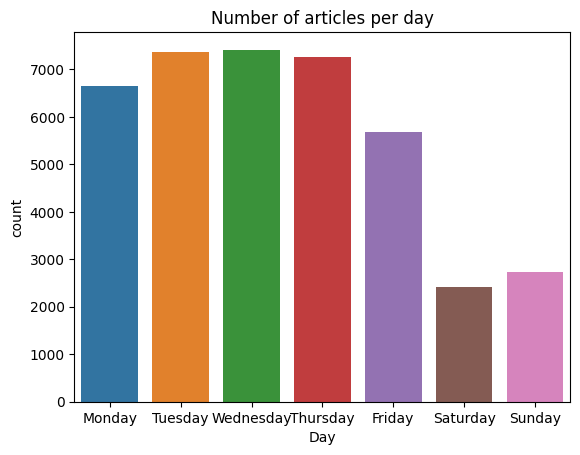

In [136]:
# the number of articles per day
sns.countplot(x='Day', data=df)
plt.title('Number of articles per day')
plt.show()

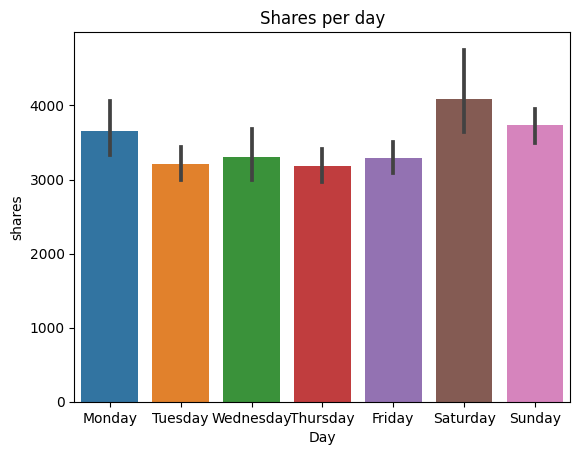

In [137]:
# now the shares per day
sns.barplot(x='Day', y='shares', data=df)
plt.title('Shares per day')
plt.show()

In [138]:
# drop column newly created 'Day'
df.drop(columns=['Day'], inplace=True)

### is there more or less shares on any article subject?

In [139]:
# new column 'Subject' using one-hot encoded columns 'data_channel_is_ ...'
def to_subject(row):
    if row['data_channel_is_lifestyle'] == 1:
        return 'Lifestyle'
    elif row['data_channel_is_entertainment'] == 1:
        return 'Entertainment'
    elif row['data_channel_is_bus'] == 1:
        return 'Business'
    elif row['data_channel_is_socmed'] == 1:
        return 'Social Media'
    elif row['data_channel_is_tech'] == 1:
        return 'Tech'
    elif row['data_channel_is_world'] == 1:
        return 'World'
    else:
        return 'No subject'

df['Subject'] = df.apply(to_subject, axis=1)

df.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words   
0            12.0             219.0         0.663594               1.0  \
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos   
0                  0.815385        4.0             2.0       1.0         0.0  \
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  num_keywords  data_channel_is_lifestyle   
0              4.680365           5.0                        0.0  \
1              4.913725           4.0                        0.0   
2              4.393365           6.0                        0.0   
3              4.404896           7.0                        0.0   
4              4.682836           7.0                        0.0   

   data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed   
0                            1.0                  0.0                     0.0  \
1                            0.0                  1.0                     0.0   
2                            0.0                  1.0                     0.0   
3                            1.0                  0.0                     0.0   
4                            0.0                  0.0                     0.0   

   data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min   
0                   0.0                    0.0         0.0         0.0  \
1                   0.0                    0.0         0.0         0.0   
2                   0.0                    0.0         0.0         0.0   
3                   0.0                    0.0         0.0         0.0   
4                   1.0                    0.0         0.0         0.0   

   kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg   
0         0.0         0.0         0.0         0.0         0.0         0.0  \
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   kw_avg_avg  self_reference_min_shares  self_reference_max_shares   
0         0.0                      496.0                      496.0  \
1         0.0                        0.0                        0.0   
2         0.0                      918.0                      918.0   
3         0.0                        0.0                        0.0   
4         0.0                      545.0                    16000.0   

   self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday   
0                  496.000000                1.0                 0.0  \
1                    0.000000                1.0                 0.0   
2                  918.000000                1.0                 0.0   
3                    0.000000                1.0                 0.0   
4                 3151.157895                1.0                 0.0   

   weekday_is_wednesday  weekday_is_thursday  weekday_is_friday   
0                   0.0                  0.0                0.0  \
1                   0.0                  0.0                0.0   
2                   0.0                  0.0                0.0   
3                   0.0                  0.0                0.0   
4                   0.0                  0.0                0.0   

   weekday

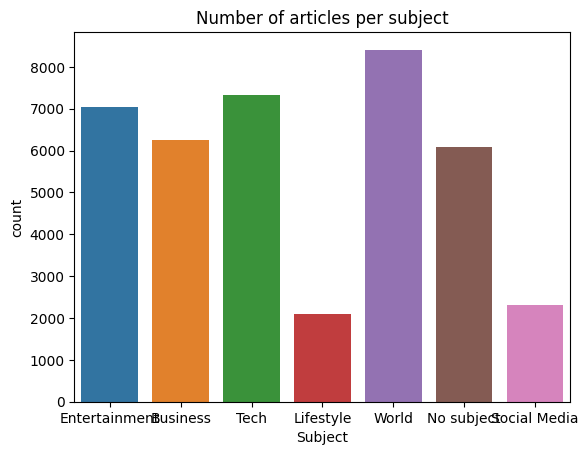

In [140]:
# the number of articles per subject
sns.countplot(x='Subject', data=df)
plt.title('Number of articles per subject')
plt.show()

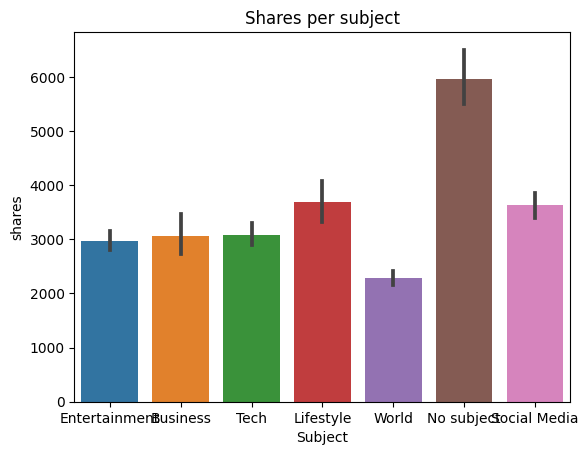

In [141]:
# now the shares per subject
sns.barplot(x='Subject', y='shares', data=df)
plt.title('Shares per subject')
plt.show()

### let's see how the words influence the shares

In [142]:
fig = px.scatter(df, x="n_tokens_content", y="shares", title="Link between n_tokens_content (number of words) and shares", width=2000, height=700)
fig.show()

Here, we see that the number of words have a influence on the number of shares. And not in the way we thought. An article with many words is not necessarily shared more than an article with few words. We can see that the articles with the most shares have between 0 and 500 words.

### and what about the subjectivity/polarity?

Important to note:
- the subjectivity is the measure of the opinion in the article (is it based on facts or on opinions?), if near 0, the article is objective, if near 1, the article is subjective;
- the polarity is the measure of the positivity of the article (is it positive or negative?), if near 0, the article is neutral, if near 1, the article is positive, if near -1, the article is negative.

In [143]:
# subjectivity
fig = px.scatter(df, x="global_subjectivity", y="shares", title="Link between global_subjectivity and shares", width=2000, height=700)
fig.show()

Here, concerning the subjectivity in the articles, it seems that the distribution follows a normal distribution.

In [144]:
# polarity
fig = px.scatter(df, x="global_sentiment_polarity", y="shares", title="Link between global_sentiment_polarity and shares", width=2000, height=700)
fig.show()

Same thing here for the polarity in the articles. We can note that the distribution is more centered around 0 (because the articles polarity can be negative) but not exactly, it seems that the polarity is more positive than negative.

### let's see what is says in function of the subject

Text(0.5, 1.0, 'Absolute title subjectivity per subject')

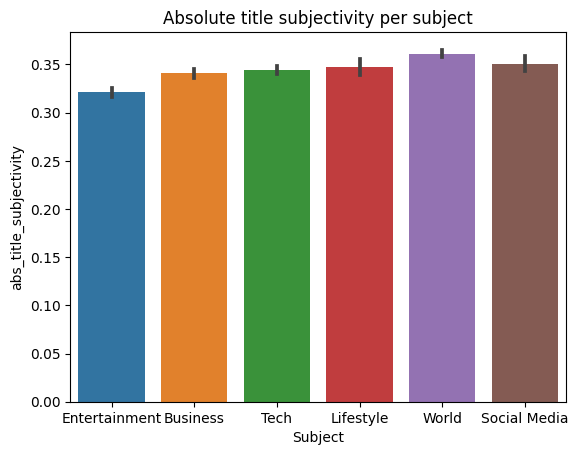

In [145]:
df_wo_nosubj = df[df['Subject'] != 'No subject'] # takes out the 'No subject' value, as we can't interpret them

sns.barplot(x='Subject', y='abs_title_subjectivity', data = df_wo_nosubj)
plt.title('Absolute title subjectivity per subject')

This plot shows us that World, Lifestyle and Social Media have the most absolute subjective titles. However, there is a very little disparity between subjects.

Text(0.5, 1.0, 'Felt title subjectivity per subject')

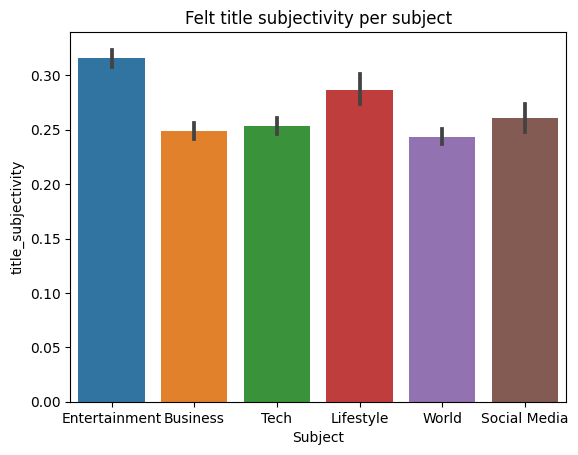

In [146]:
sns.barplot(x='Subject', y='title_subjectivity', data = df_wo_nosubj)
plt.title('Felt title subjectivity per subject')

When taking the 'felt' title subjectity, disparities are much higher. The Entertainment section of the website has as much higher title subjectivity than the other ones. In second place is LifeStyle, which is also a lot higher. All the other ones are close to each other.

An important thing to note is that the two lowest are the World and Business subjects, which include elements of politics. Given the usual subjecitivty of this matter, it is quite surprising to see a low subjectivity title score. This can mean that the article on Mashable on World and Business are quite objective.

Text(0.5, 1.0, 'Content subjectivity per subject')

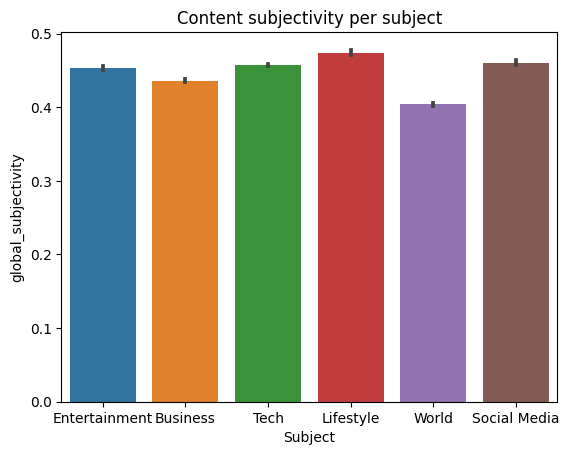

In [147]:
sns.barplot(x='Subject', y='global_subjectivity', data = df_wo_nosubj)
plt.title('Content subjectivity per subject')

When taking solely the subjectivty of the content (as opposed to the titles before), World remains by far the most objective. Business is still the second least subjective.

And Lifestyle, which had the second most subjective titles, has the most subjective content.

Text(0.5, 1.0, 'Content polarity per subject')

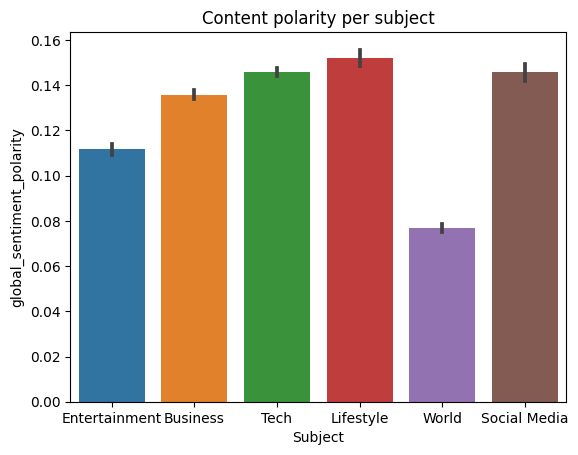

In [148]:
sns.barplot(x='Subject', y='global_sentiment_polarity', data = df_wo_nosubj)
plt.title('Content polarity per subject')

In [149]:
# drop column newly created 'Subject'
df.drop(columns=['Subject'], inplace=True)

### what is the efficiency of keywords?

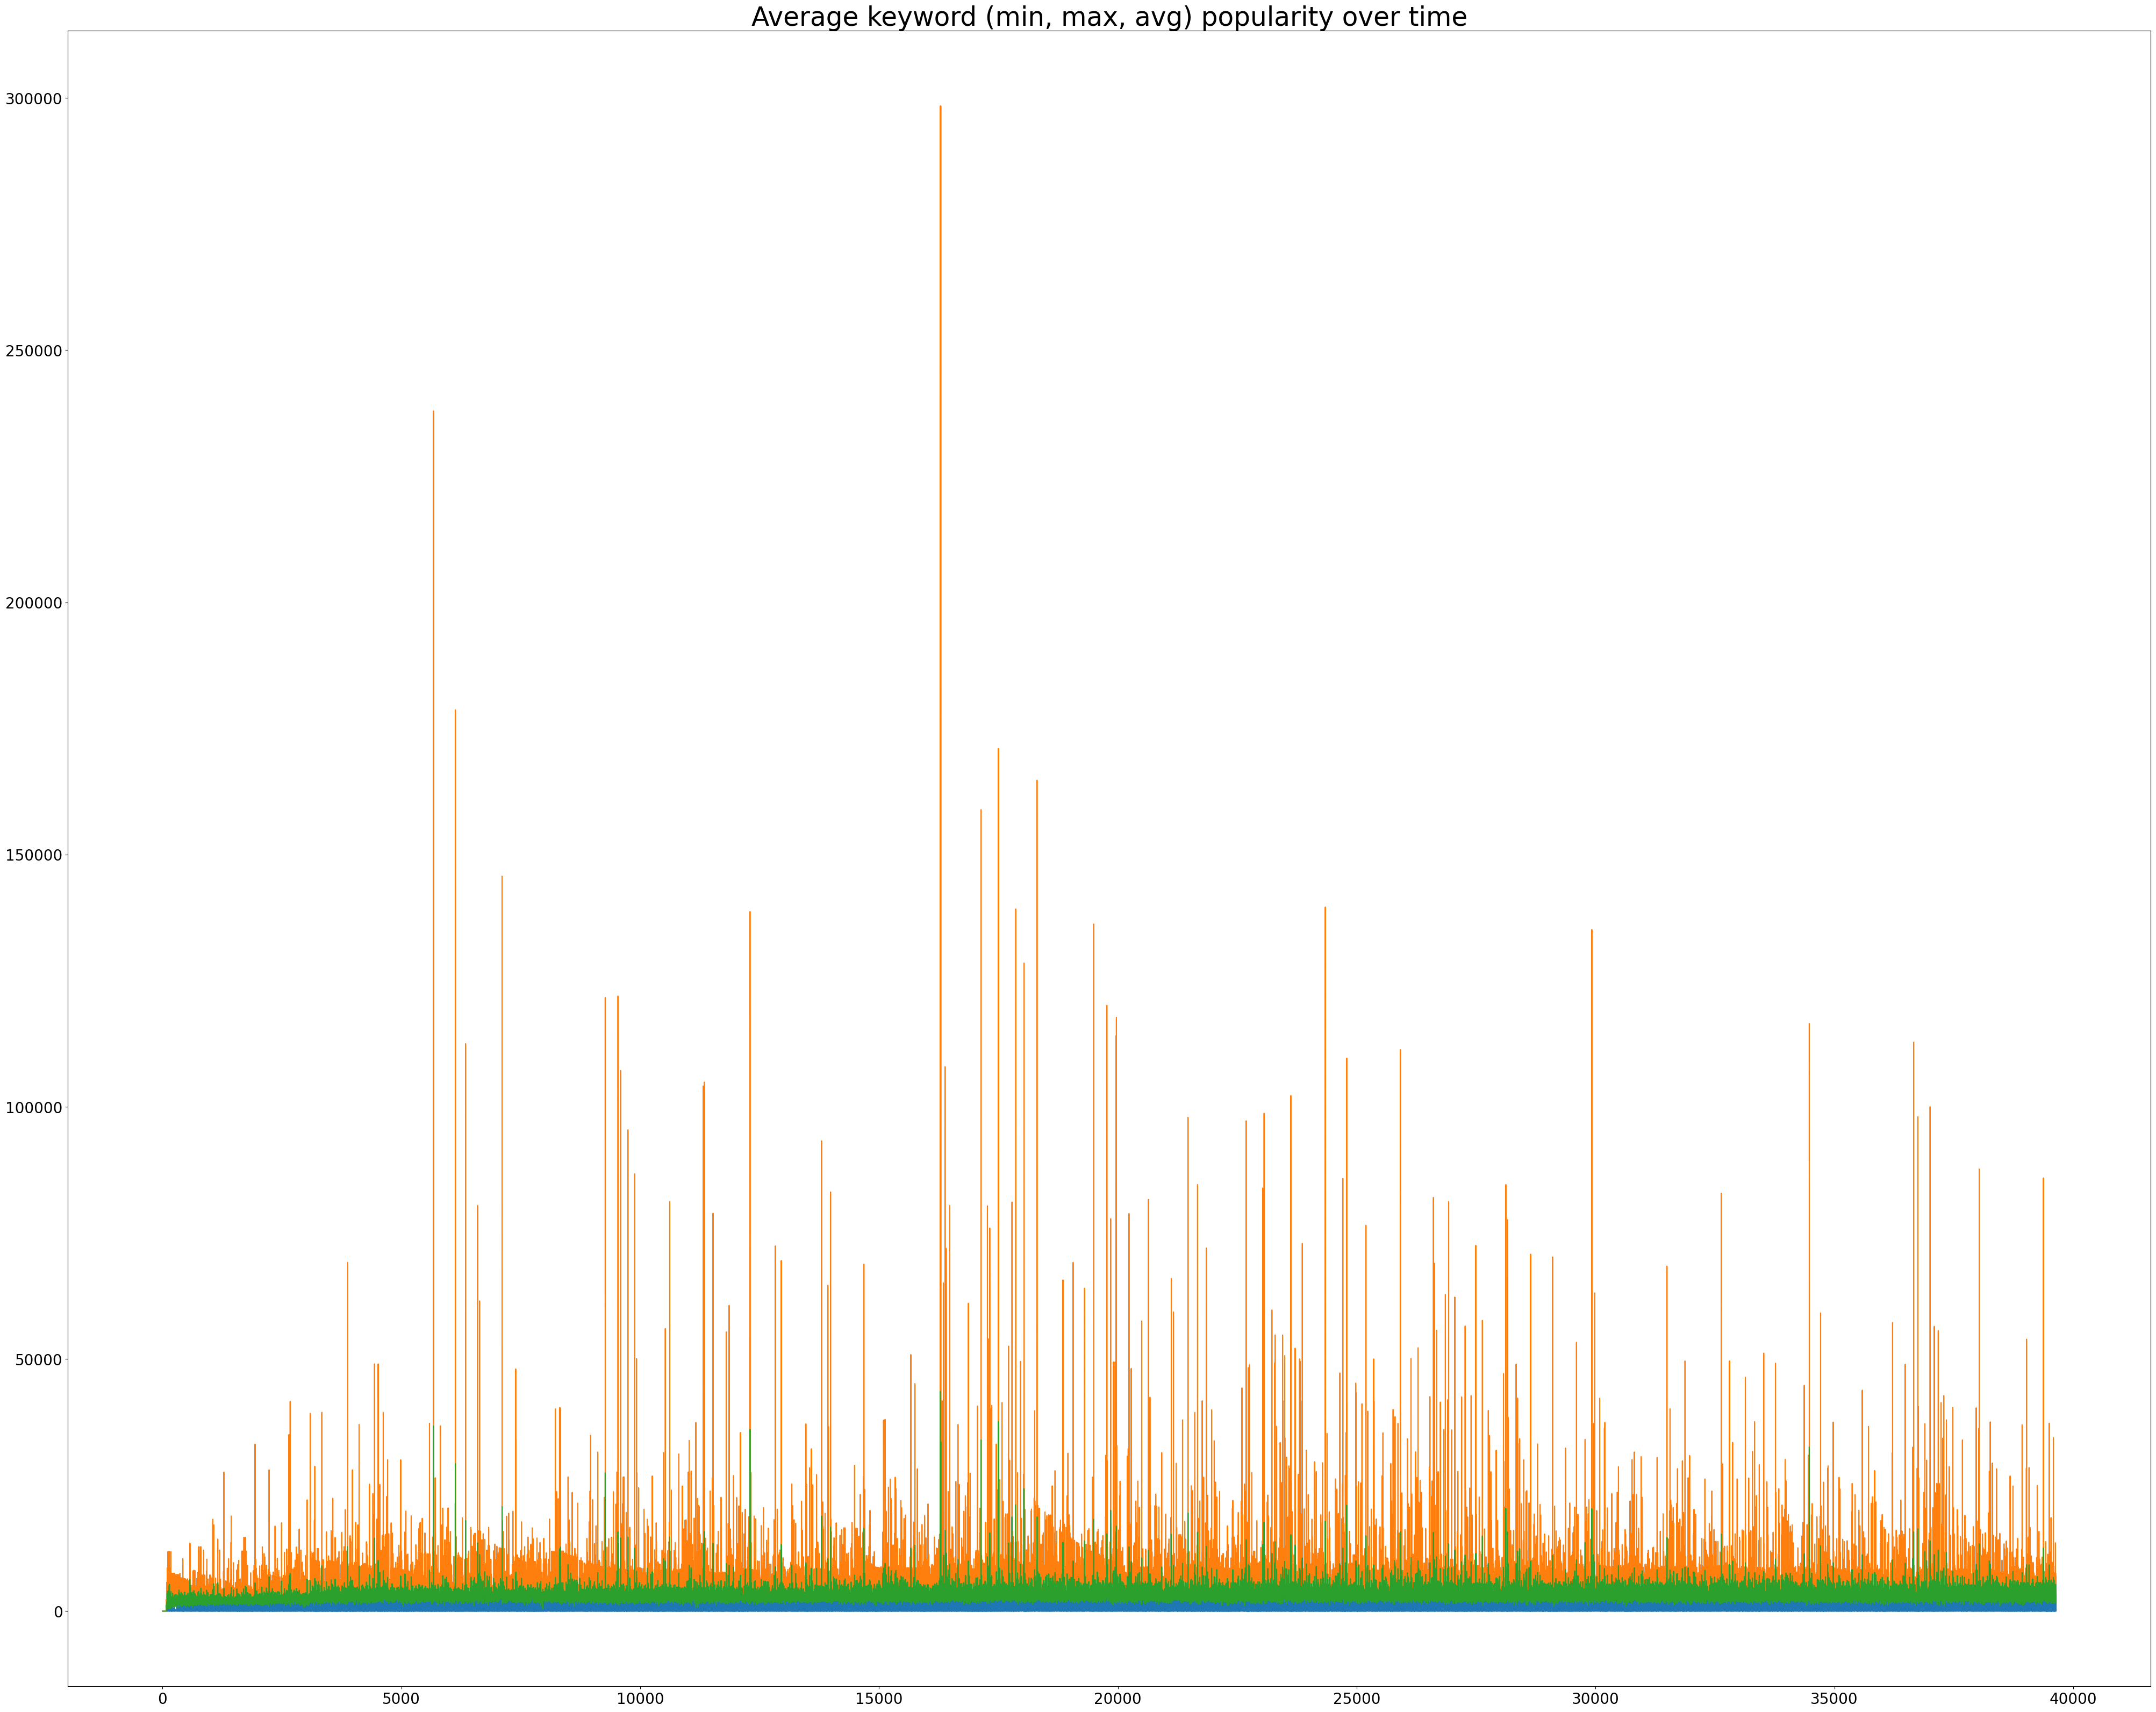

In [150]:
avg_kw_plt = df[['kw_min_avg','kw_max_avg','kw_avg_avg']]
plt.figure(figsize=(50,40))
plt.plot(avg_kw_plt)
plt.title('Average keyword (min, max, avg) popularity over time', fontsize=35)
plt.tick_params(labelsize=20)
plt.show()

Link between the subjectivity of the title and the number of shares.

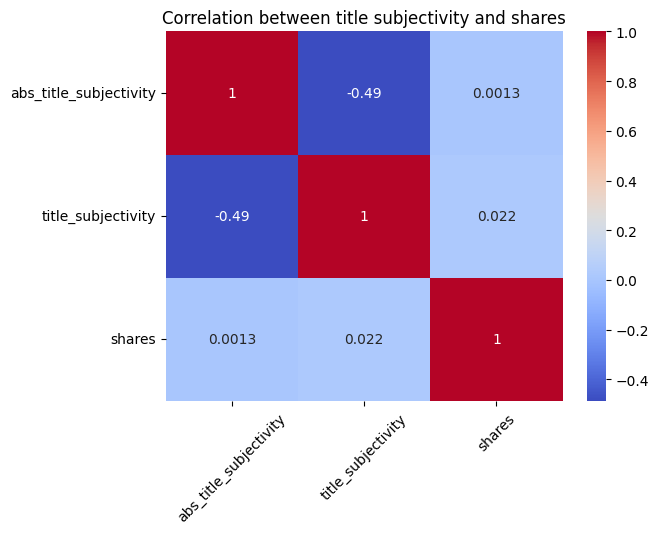

In [151]:
sns.heatmap(df[['abs_title_subjectivity','title_subjectivity', 'shares']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between title subjectivity and shares')
plt.xticks(rotation=45)
plt.show()

This heatmap proves two things:
- firstly, the way a title is interpreted by an interested or avid reader (title_subjectivity) is negatively correlated to the way a more objective reader interprets that title. In other words, a biased title according to a frequent reader has a high chance of being interpreted as unbiased by a new reader;
- secondly,the correlation between the relative subjectivity and the amount of shares is 10 times higher than that of the absolute subjectivity. However both values are extremely low : the subjectivity, absolute or relative, of a title is almost completely unrelated to the amount of times said article will be shared.

Link between the title length and the number of shares.

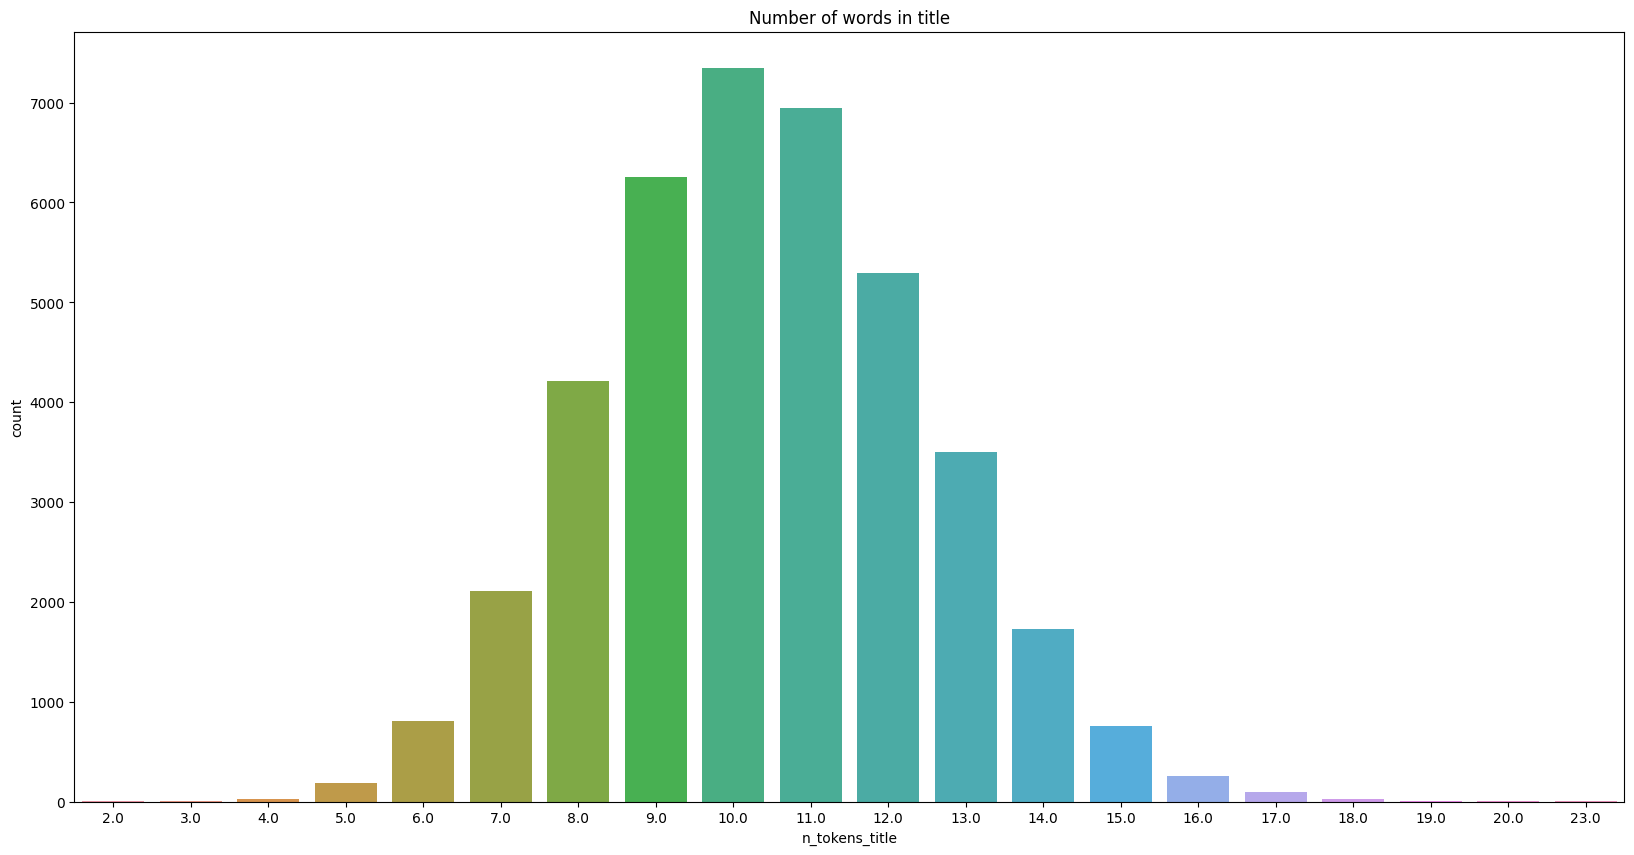

In [152]:
plt.figure(figsize=(20,10))
sns.countplot(x='n_tokens_title', data=df)
plt.title('Number of words in title')
plt.show()

Link between the number of videos/images and number of shares.

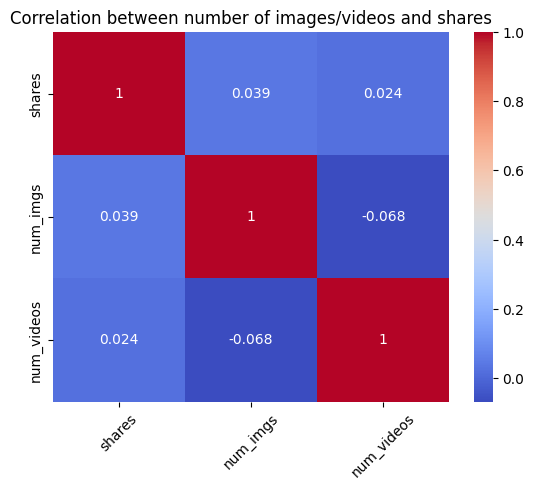

In [153]:
sns.heatmap(df[['shares','num_imgs', 'num_videos']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between number of images/videos and shares')
plt.xticks(rotation=45)
plt.show()

Link between positivity/negativity and shares.

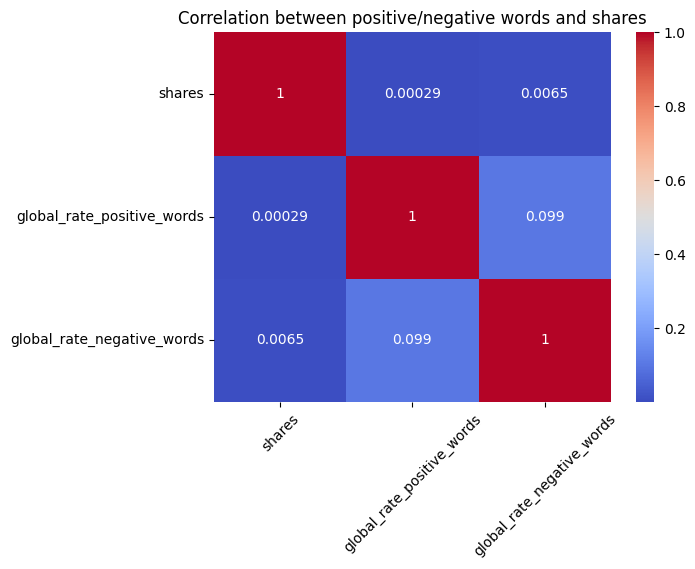

(None,)

In [154]:
sns.heatmap(df[['shares','global_rate_positive_words', 'global_rate_negative_words' ]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between positive/negative words and shares')
plt.xticks(rotation=45)
plt.show(),

Negative articles are 10 times more likely to be shared. But the correlation between the positivity or negativity of the article and the amount of shares is still very low.

## Modeling using machine learning

In [155]:
from sklearn.model_selection import train_test_split

# import the scaler
from sklearn.preprocessing import StandardScaler

# import the grid search
from sklearn.model_selection import GridSearchCV

# import the models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import the metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

### useful functions

Here, we define some functions that we will use later, and may be really useful.

First, we define two new variables:
- `X`: the features;
- `Y`: the target.

In [156]:
# split the dataframe into two variables
X = df.drop(columns=['shares']) # features
Y = df['shares'] # target

In [157]:
# transform the task into a binary task using a decision threshold of 1400
Y = Y.apply(lambda x: 1 if x >= 1400 else 0)

In [158]:
X

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words   
0                12.0             219.0         0.663594               1.0  \
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs   
0                      0.815385        4.0             2.0       1.0  \
1                      0.791946        3.0             1.0       1.0   
2                      0.663866        3.0             1.0       1.0   
3                      0.665635        9.0             0.0       1.0   
4                      0.540890       19.0            19.0      20.0   
...                         ...        ...             ...       ...   
39639                  0.684783        9.0             7.0       1.0   
39640                  0.885057        9.0             7.0       3.0   
39641                  0.644128       24.0             1.0      12.0   
39642                  0.692661       10.0             1.0       1.0   
39643                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  num_keywords   
0             0.0              4.680365           5.0  \
1             0.0              4.913725           4.0   
2             0.0              4.393365           6.0   
3             0.0              4.404896           7.0   
4             0.0              4.682836           7.0   
...           ...                   ...           ...   
39639         1.0              4.523121           8.0   
39640        48.0              4.405488           7.0   
39641         1.0              5.076923           8.0   
39642         0.0              4.975073           5.0   
39643         2.0              4.471338           4.0   

       data_channel_is_lifestyle  data_channel_is_entertainment   
0                            0.0                            1.0  \
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            1.0   
4                            0.0                            0.0   
...                          ...                            ...   
39639                        0.0                            0.0   
39640                        0.0                            0.0   
39641                        0.0                            0.0   
39642                        0.0                            0.0   
39643                        0.0                            1.0   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech   
0                      0.0                     0.0                   0.0  \
1                      1.0                     0.0                   0.0   
2                      1.0                     0.0                   0.0   
3                      0.0                     0.0                   0.0   
4                      0.0                     0.0                   1.0   
...                    ...                     ...                   ...   
39639                  0.0                     0.0                   1.0   
39640                  0.0                     1.0                   0.0   
39641                  0.0     

In [159]:
Y

0        0
1        0
2        1
3        0
4        0
        ..
39639    1
39640    1
39641    1
39642    0
39643    0
Name: shares, Length: 39543, dtype: int64

Now we split the data into training and testing sets. We use 80% of the data for training and 20% for testing.

In [160]:
# split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # use 20% of the data for testing

Here, we gonna plot a correlation matrix to see if there is any correlation between the features. If so, we will drop the feature in question.

Reminder: columns with a correlation coefficient near 0 are not correlated, and columns with a correlation coefficient near 1 are highly correlated.

We suppose that the correlation coefficient threshold is 0.85. If the correlation coefficient is greater than 0.85, we drop the feature in question.

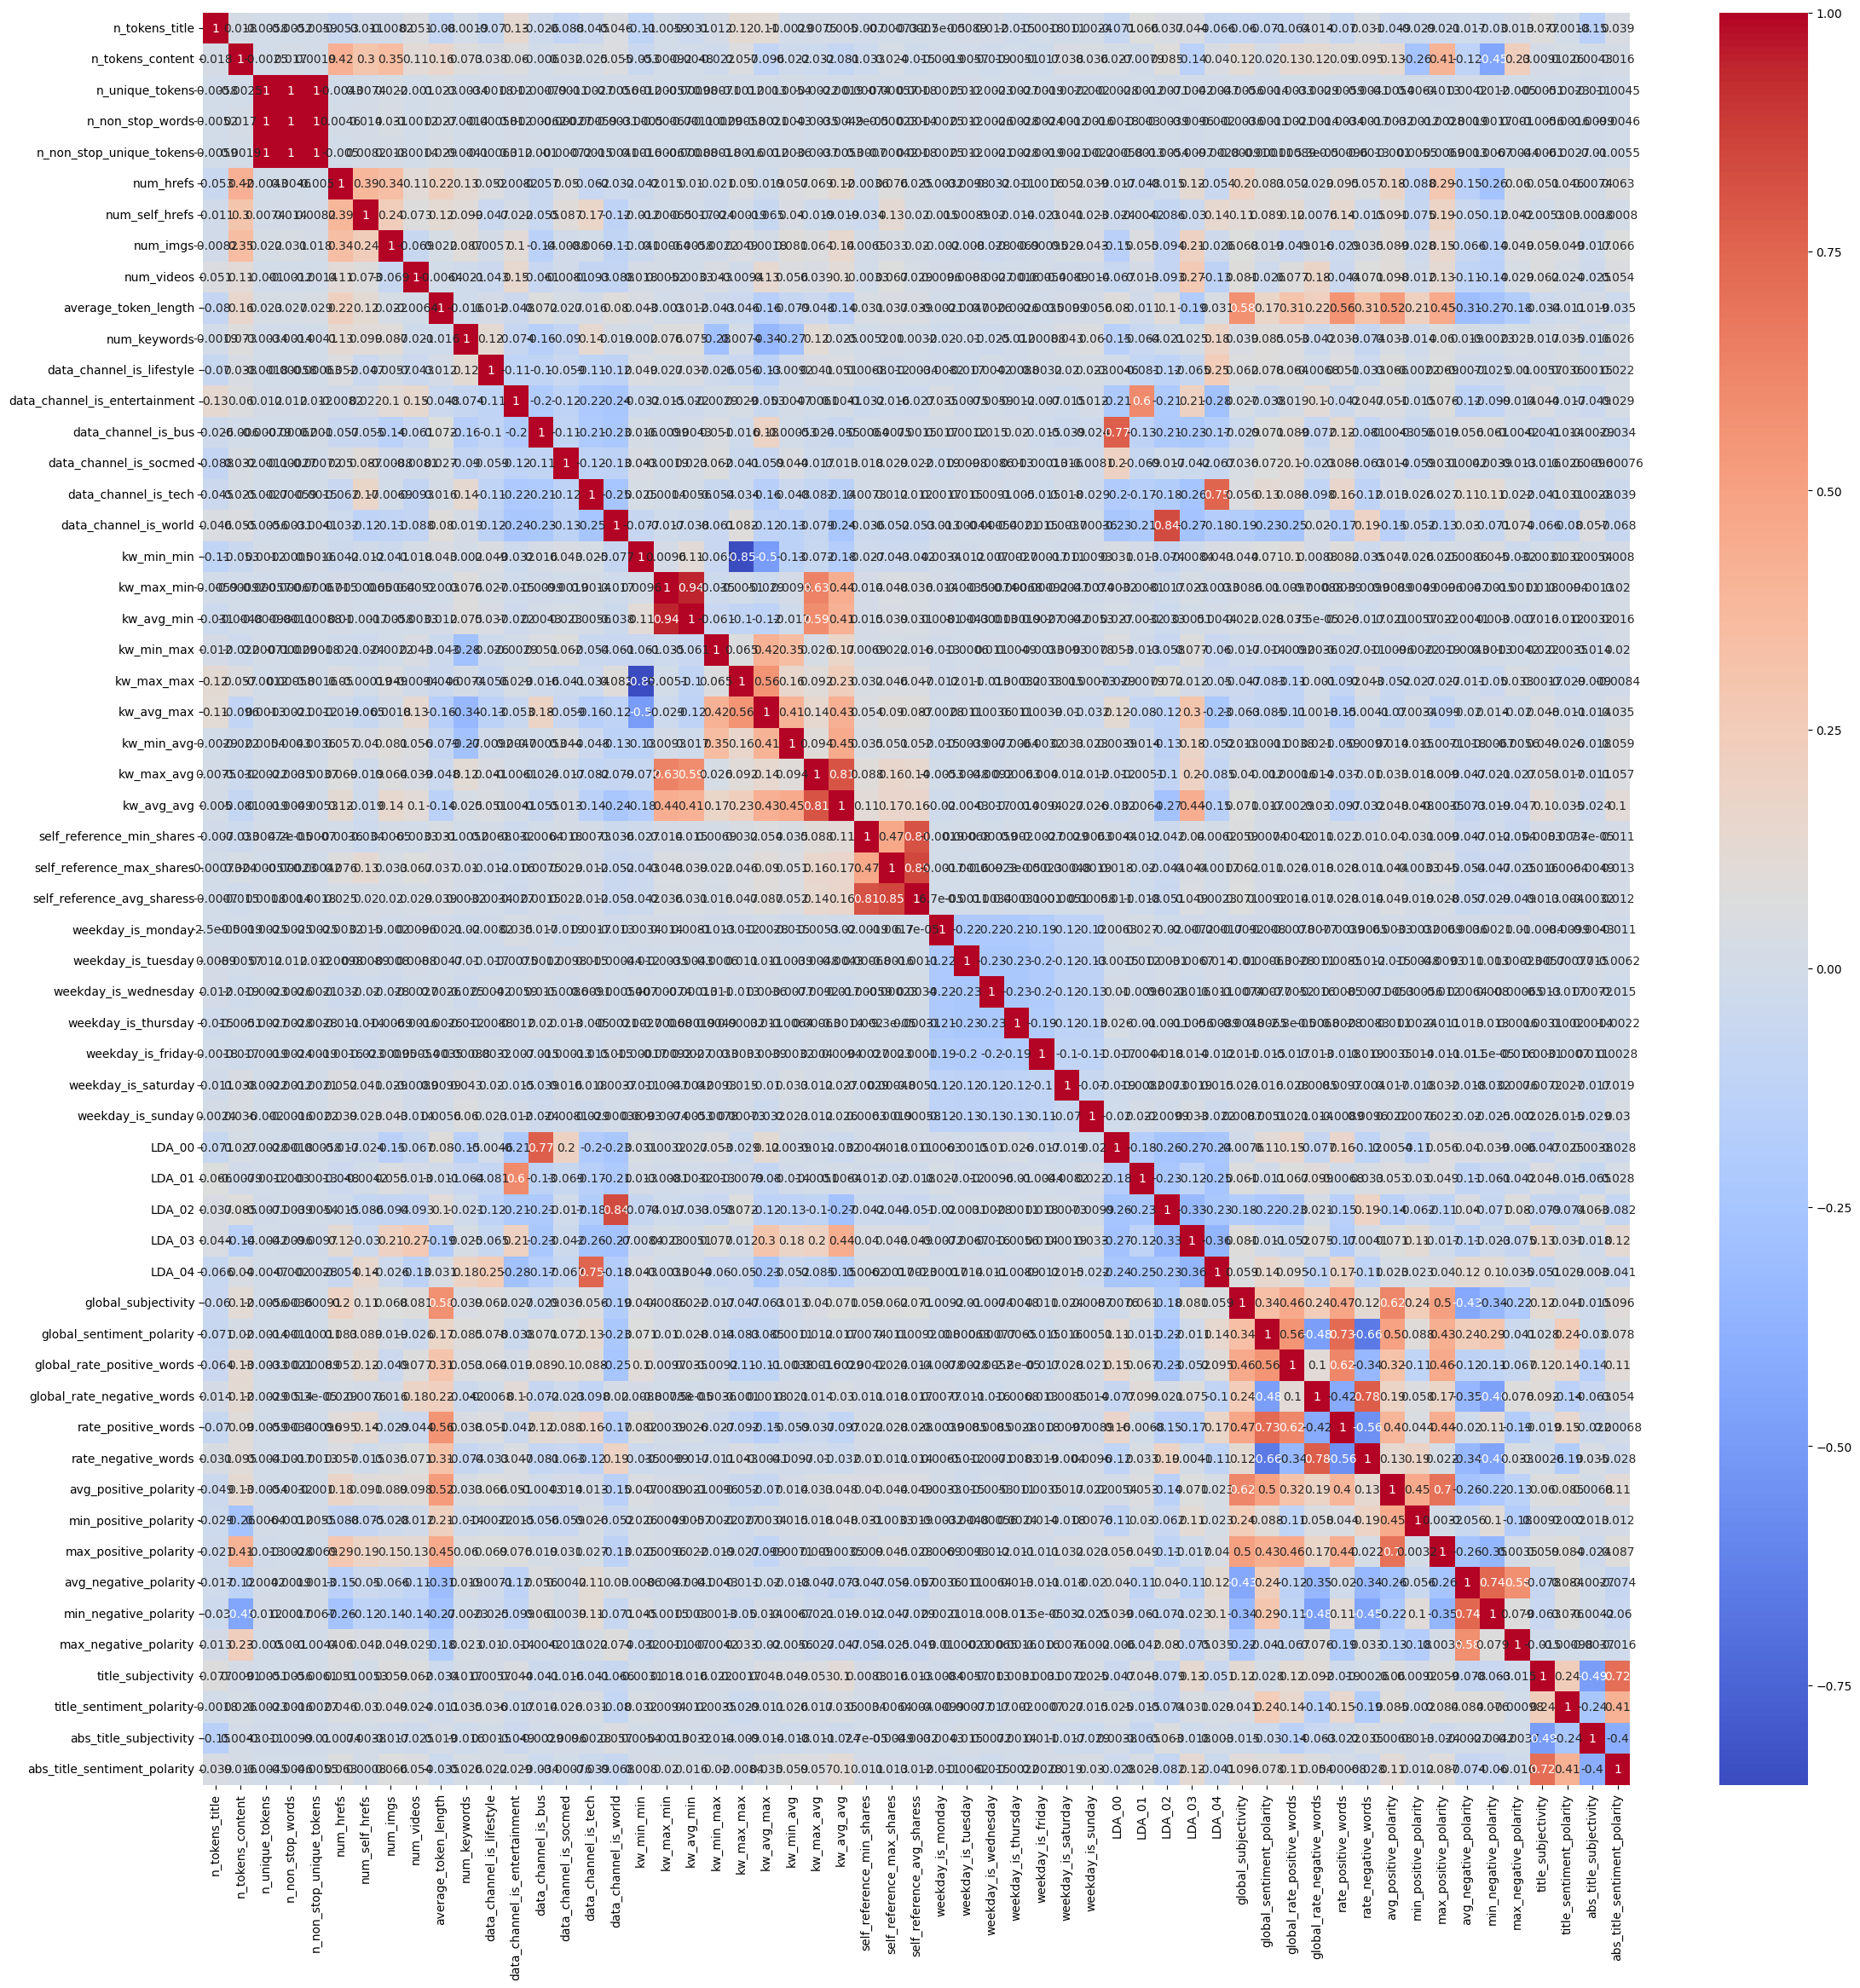

In [161]:
# plot the correlation matrix
plt.figure(figsize=(27,27))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.show()

The features that we will drop are:
- `n_non_stop_words`;
- `n_non_stop_unique_tokens`;
- `kw_avg_min`;
- `self_reference_avg_shares`.

In [162]:
# columns to drop
col_drop = ['n_non_stop_words',
            'n_non_stop_unique_tokens',
            'kw_avg_min',
            'self_reference_min_shares']

# drop the columns
X_train = X_train.drop(columns=col_drop)
X_test = X_test.drop(columns=col_drop)

Let's see the distribution of each feature.

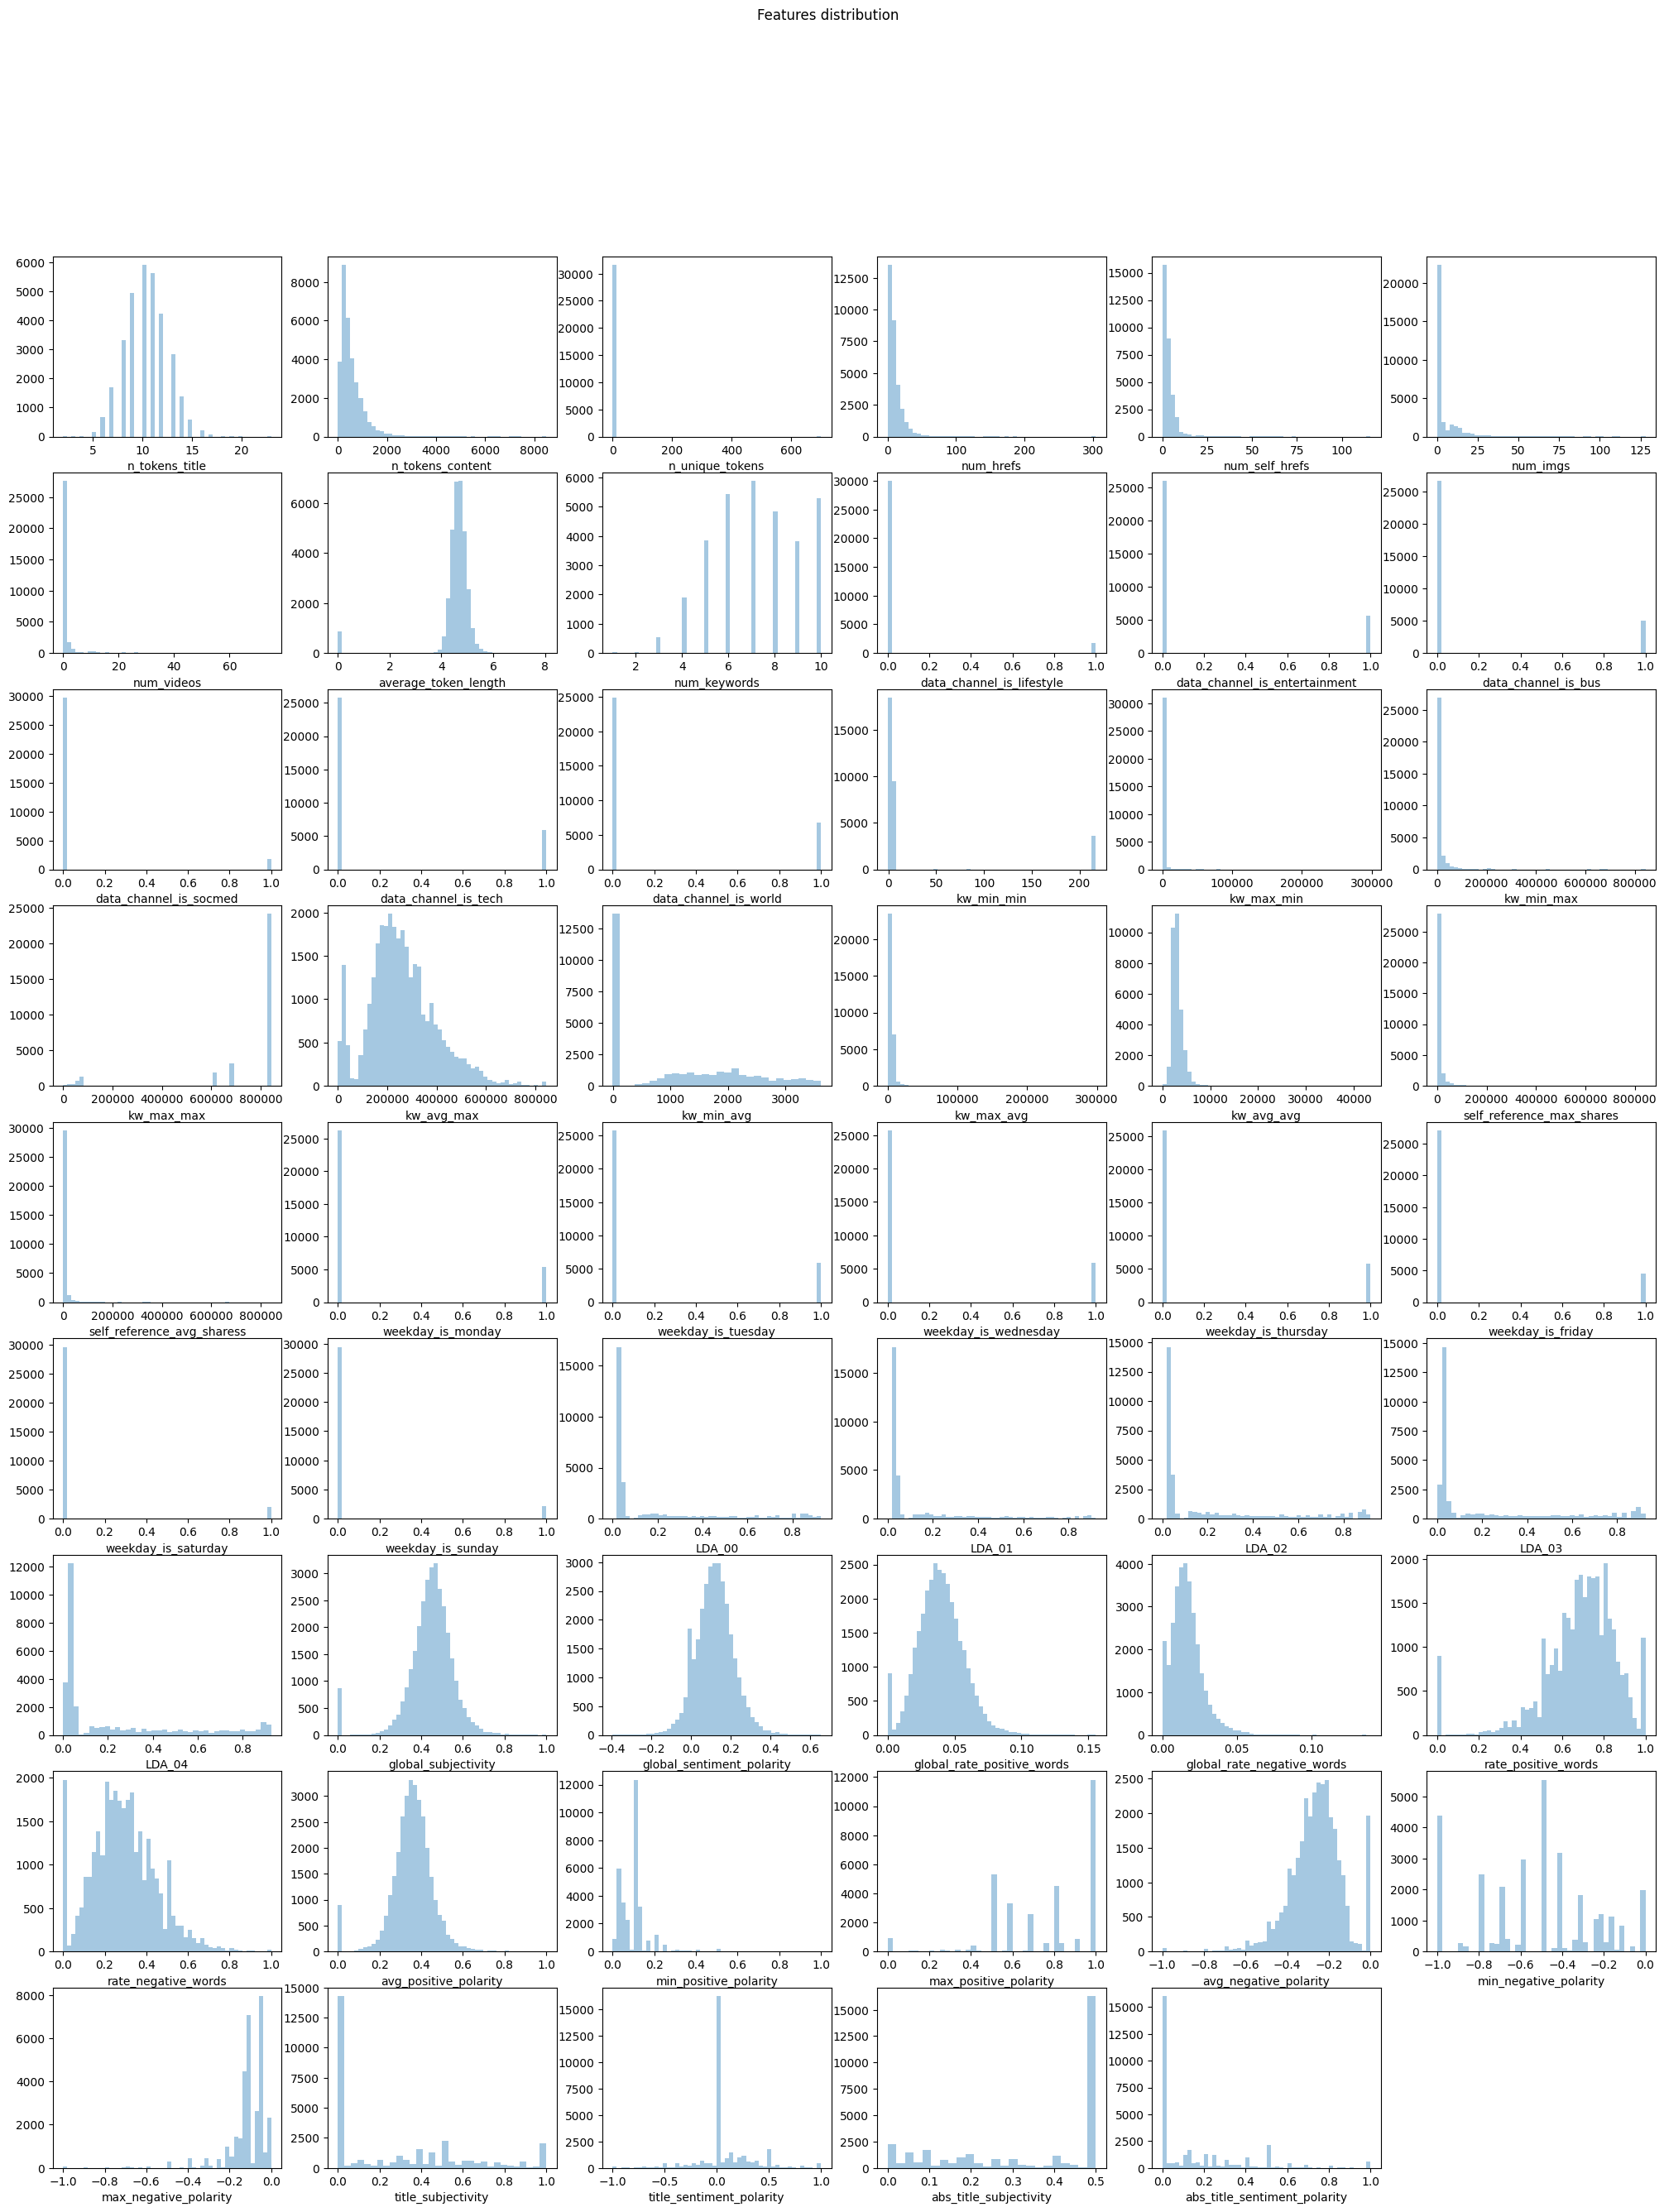

In [163]:
# plot the distribution of each feature
fig, ax = plt.subplots(figsize=(25, 30))
fig.suptitle('Features distribution')

for i, col in enumerate(X_train.columns):
    plt.subplot(9, 6, i+1)
    sns.distplot(X_train[col], kde=False)

plt.show()

Now we define a variable `col_encoded` that contains the names of the columns that are encoded. We will not use theses columns for scaling. In fact, binary columns should generally not be standardized as it can alter their original binary interpretation (0 or 1) and introduce a level of continuity that was not present initially.

In [164]:
# columns encoded
col_encoded = ['data_channel_is_lifestyle',
               'data_channel_is_entertainment',
               'data_channel_is_bus',
               'data_channel_is_socmed',
               'data_channel_is_tech',
               'data_channel_is_world',
               'weekday_is_monday',
               'weekday_is_tuesday',
               'weekday_is_wednesday',
               'weekday_is_thursday',
               'weekday_is_friday',
               'weekday_is_saturday',
               'weekday_is_sunday']

# columns to scale
col_scaled = X_train.drop(columns=col_encoded).columns

In [165]:
# scale the numerical columns (not the ones encoded)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.drop(columns=col_encoded))
X_test_scaled = scaler.transform(X_test.drop(columns=col_encoded))

We create two functions, one to evaluate a regression model, and one to evaluate a classification model. Then, we create a function to find the best parameters using GridSearchCV on any model.

In [166]:
# function to evaluate a regression model
def evaluate_regression_model(model):
    # fit the model
    model.fit(X_train_scaled, Y_train)

    # predict the target
    Y_pred = model.predict(X_test_scaled)

    # convert Y_pred to binary
    Y_pred = np.where(Y_pred >= 0.5, 1, 0)

    # calculate the metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    return Y_pred, accuracy, mse, r2

# function to print the regression results
def print_regression_results(accuracy, mse, r2):
    print('Accuracy: ', accuracy)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

In [167]:
# function to evluate a classification model
def evaluate_classification_model(model):
    # fit the model
    model.fit(X_train_scaled, Y_train)

    # predict the target
    Y_pred = model.predict(X_test_scaled)

    # calculate the metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    confusion = confusion_matrix(Y_test, Y_pred)

    return Y_pred, accuracy, precision, confusion

# function to print the classification results
def print_classification_results(accuracy, precision, confusion):
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Confusion matrix: \n', confusion)

In [168]:
# fucntion to find the best parameters for the model
def find_best_params(model, params):
    # create the grid search
    grid_search = GridSearchCV(model, params, cv=2, scoring='accuracy') # with 5-fold cross validation

    # fit the grid search
    grid_search.fit(X_train_scaled, Y_train)

    return grid_search.best_params_

Here, we create a dictionary to store the accuracy results of each model. We will use it later to compare the models.

In [169]:
# create the dictionary
accuracies = {}

Now, let's do some supervised machine learning. We will use the following algorithms:
- linear regression;
- lasso regression;
- kneighbors regression;
- support vector classifier;
- decision tree classifier;
- random forest classifier.

What's the difference between regression and classification algorithms? Regression algorithms are used to predict a continuous value. Classification algorithms are used to predict a discrete value. For now, we kept Y as a continuous value, so we will use regression algorithms. Later, we will decide a threshold to convert Y into a discrete value and use classification algorithms.

### Supervised machine learning (regression and classification algorithms)

#### LinearRegression

In [170]:
# evaluate the model
Y_pred, accuracy, mse, r2 = evaluate_regression_model(LinearRegression())

# print the results
print_regression_results(accuracy, mse, r2)

# add the accuracy to the dictionary
accuracies['LinearRegression'] = accuracy

Accuracy:  0.6258692628650904
Mean Squared Error: 0.3741307371349096
R-squared: -0.5020323849169899


#### Lasso

In [171]:
# evaluate the model
Y_pred, accuracy, mse, r2 = evaluate_regression_model(Lasso())

# print the results
print_regression_results(accuracy, mse, r2)

# add the accuracy to the dictionary
accuracies['Lasso'] = accuracy

Accuracy:  0.5302819572638766
Mean Squared Error: 0.4697180427361234
R-squared: -0.8857892226990933


#### KNeighborsClassifier

In [172]:
# evaluate the model
Y_pred, accuracy, precision, confusion = evaluate_classification_model(KNeighborsClassifier())

# print the results
print_classification_results(accuracy, precision, confusion)

# add the accuracy to the dictionary
accuracies['KNeighborsClassifier'] = accuracy

Accuracy:  0.5875584776836515
Precision:  0.6125060357315306
Confusion matrix: 
 [[2110 1605]
 [1657 2537]]


#### SVC

In [173]:
# evaluate the model
Y_pred, accuracy, precision, confusion = evaluate_classification_model(SVC())

# print the results
print_classification_results(accuracy, precision, confusion)

# add the accuracy to the dictionary
accuracies['SVC'] = accuracy

Accuracy:  0.639903906941459
Precision:  0.6449181739879414
Confusion matrix: 
 [[2066 1649]
 [1199 2995]]


Let's do a grid search on the SVC model to find the best parameters. It is the best model for now.

In [174]:
# search the best parameters for the model
params = {'C': [1, 10, 100],
          'gamma': [0.1, 0.01, 0.001]}
best_params = find_best_params(SVC(), params)

# print the best parameters
print(best_params)

{'C': 10, 'gamma': 0.01}


In [175]:
# evaluate the model
Y_pred, accuracy, precision, confusion = evaluate_classification_model(SVC(C=best_params['C'], gamma=best_params['gamma']))

# print the results
print_classification_results(accuracy, precision, confusion)

# add the accuracy to the dictionary
accuracies['SVC_gridsearch'] = accuracy

Accuracy:  0.6392717157668479
Precision:  0.6479152878888154
Confusion matrix: 
 [[2119 1596]
 [1257 2937]]


### Unsupervised machine learning (decision trees)

#### DecisionTreeClassifier

In [176]:
# evaluate the model
Y_pred, accuracy, precision, confusion = evaluate_classification_model(DecisionTreeClassifier())

# print the results
print_classification_results(accuracy, precision, confusion)

# add the accuracy to the dictionary
accuracies['DecisionTreeClassifier'] = accuracy

Accuracy:  0.5737767100771273
Precision:  0.5976738666033705
Confusion matrix: 
 [[2020 1695]
 [1676 2518]]


#### RandomForestClassifier

In [177]:
# evaluate the model
Y_pred, accuracy, precision, confusion = evaluate_classification_model(RandomForestClassifier())

# print the results
print_classification_results(accuracy, precision, confusion)

# add the accuracy to the dictionary
accuracies['RandomForestClassifier'] = accuracy

Accuracy:  0.6371222657731698
Precision:  0.6433521004763967
Confusion matrix: 
 [[2068 1647]
 [1223 2971]]


Let's do a grid search on the RandomForestClassifier model to find the best parameters. It is the new best model for now.

In [178]:
# search the best parameters for the model
params = {'n_estimators': [50, 100, 200],
          'max_depth': [10, 20, 30]}
best_params = find_best_params(RandomForestClassifier(), params)

# print the best parameters
print(best_params)

{'max_depth': 30, 'n_estimators': 200}


In [179]:
# evaluate the model
Y_pred, accuracy, precision, confusion = evaluate_classification_model(RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth']))

# print the results
print_classification_results(accuracy, precision, confusion)

# add the accuracy to the dictionary
accuracies['RandomForestClassifier_gridsearch'] = accuracy

Accuracy:  0.6473637628018712
Precision:  0.6501389185723445
Confusion matrix: 
 [[2078 1637]
 [1152 3042]]


## Modeling using deep learning

First, let's take a look at our data. We can see that it has already been cleaned.

Next, we import everything we need, which will come from 3 libraries: tensorflow, sklearn, scikeras.

In [180]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam

from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

Now we can split again the dataframe into input X and target Y using train_test_split. After that, we will apply a StandardScaler to the input data for standardization and scaling.

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### random search for hyperparameter tuning

Now we're gonna use Random Search cross validation to perform hyperparameter tuning in order to determine which parameters give us the best model possible. We choose Random Search over Grid Search because the amount of parameters we're testing would make for a very long and expensive grid search, since we'd have to navigate all combinations.

First, we define a function to create the model we'll use for the Random Search and we give it default parameter values. Secondly, we define the function that will perform the Random Search with the help of the first function we built. In this second function, we first define the model to be searched as well as the dictionnary containing the arrays of parameter values we wish to test. Next, we initiate the Random Search cross validation process with 10 iterations and 3 folds and fit our training data to it. Finally, the function returns the best parameter combination and displays the scores of each tested combination. We also have a Grid Search function that works the same as our Random Search function; however, as stated before we won't use it since it would be very expensive and time consuming.

In [182]:
def create_model(lr_rate=0.001, dropout_rate=0.5, units=[128, 64, 32]):
    model = Sequential()
    model.add(Input(shape=(X_train_scaled.shape[1],)))
    
    for unit in units:
        model.add(Dense(unit, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=lr_rate)
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    
    return model

def rand_search_model():
    model = KerasClassifier(build_fn=create_model, units=[128, 64, 32], dropout_rate=0.5, lr_rate=0.001, epochs=20, batch_size=32, verbose=0)

    param_dist = {
        'dropout_rate': [0.3, 0.5, 0.7],
        'units': [[64, 32], [128, 64, 32]],
        'batch_size': [16, 32, 64],
        'epochs': [10, 20, 30]
    }

    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_dist,
        n_iter=10,
        cv=3,
        verbose=2,
        scoring='accuracy'
    )

    search_result = random_search.fit(X_train_scaled, Y_train)

    print("Best: %f using %r" % (search_result.best_score_, search_result.best_params_))
    means = search_result.cv_results_['mean_test_score']
    params = search_result.cv_results_['params']
    for mean, param in zip(means, params):
        print("%f with: %r" % (mean, param))
    
    return search_result.best_params_

def grid_search_model():
    model = KerasClassifier(build_fn=create_model, units=[128, 64, 32], dropout_rate=0.5, lr_rate=0.001, epochs=20, batch_size=32, verbose=0)

    param_grid= {
        'dropout_rate': [0.3, 0.5, 0.7],
        'units': [[64, 32], [128, 64, 32]],
        'batch_size': [16, 32, 64],
        'epochs': [10, 20, 30]
    }

    grid_search = GridSearchCV(
        model,
        param_grid=param_grid,
        cv=3,
        verbose=2,
        scoring='accuracy'
    )

    search_result = grid_search.fit(X_train_scaled, Y_train)

    print("Best: %f using %r" % (search_result.best_score_, search_result.best_params_))
    means = search_result.cv_results_['mean_test_score']
    params = search_result.cv_results_['params']
    for mean, param in zip(means, params):
        print("%f with: %r" % (mean, param))
    
    return search_result.best_params_

In [183]:
best_params = rand_search_model()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[CV] END batch_size=16, dropout_rate=0.5, epochs=30, units=[128, 64, 32]; total time=  32.0s
[CV] END batch_size=16, dropout_rate=0.5, epochs=30, units=[128, 64, 32]; total time=  31.3s
[CV] END batch_size=16, dropout_rate=0.5, epochs=30, units=[128, 64, 32]; total time=  33.1s
[CV] END batch_size=32, dropout_rate=0.7, epochs=10, units=[64, 32]; total time=   5.6s
[CV] END batch_size=32, dropout_rate=0.7, epochs=10, units=[64, 32]; total time=   5.3s
[CV] END batch_size=32, dropout_rate=0.7, epochs=10, units=[64, 32]; total time=   5.4s
[CV] END batch_size=64, dropout_rate=0.3, epochs=10, units=[64, 32]; total time=   3.2s
[CV] END batch_size=64, dropout_rate=0.3, epochs=10, units=[64, 32]; total time=   3.2s
[CV] END batch_size=64, dropout_rate=0.3, epochs=10, units=[64, 32]; total time=   3.2s
[CV] END batch_size=64, dropout_rate=0.5, epochs=20, units=[64, 32]; total time=   5.7s
[CV] END batch_size=64, dropout_rate=0.5, epochs=20, units=[64, 32]; total time=   5.9s
[CV] END batch_si

Once we've obtained a good set of tuned parameters from the random search function, we give them to our binary_class_model function, which creates our final model with the given parameters and fits it to our training data and then evaluates it with our testing data. Our random search function consistently returns a set of parameters that on average provide a 66% accuracy. Since this is an average, when we create our actual model its accuracy will typically fluctuate between 65.5% and 66.5%, which is already a fairly good accuracy rate.

In [184]:
def binary_class_model(param_dict, X_tr, Y_tr, X_te, Y_te, method='random'):
    params = list(param_dict.values())
    
    if method == 'random':
        units = params[0]
        epochs = params[1]
        dropout_rate = params[2]
        batch_size = params[3]
    else: 
        batch_size = params[0]
        dropout_rate = params[1]
        epochs = params[2]
        units = params[3]
    
    model = Sequential()
    model.add(Input(shape=(X_train_scaled.shape[1],)))
    
    for unit in units:
        model.add(Dense(unit, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=0.001)
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    
    model.fit(X_tr, Y_tr, epochs=epochs, batch_size=batch_size, validation_data=(X_te, Y_te))
    
    loss, accuracy = model.evaluate(X_te, Y_te)
    print(f'Model loss: {loss} and accuracy: {accuracy}')

    # add the accuracy to the dictionary
    accuracies['NeuralNetwork'] = accuracy
    
    return model

In [185]:
binary_model = binary_class_model(best_params, X_train_scaled, Y_train, X_test_scaled, Y_test)

Epoch 1/10


1978/1978 [==============================] - 2s 913us/step - loss: 0.6599 - accuracy: 0.6192 - val_loss: 0.6278 - val_accuracy: 0.6484
Epoch 2/10
1978/1978 [==============================] - 2s 869us/step - loss: 0.6317 - accuracy: 0.6507 - val_loss: 0.6224 - val_accuracy: 0.6533
Epoch 3/10
1978/1978 [==============================] - 2s 872us/step - loss: 0.6240 - accuracy: 0.6549 - val_loss: 0.6214 - val_accuracy: 0.6490
Epoch 4/10
1978/1978 [==============================] - 2s 883us/step - loss: 0.6205 - accuracy: 0.6585 - val_loss: 0.6208 - val_accuracy: 0.6510
Epoch 5/10
1978/1978 [==============================] - 2s 868us/step - loss: 0.6172 - accuracy: 0.6604 - val_loss: 0.6176 - val_accuracy: 0.6587
Epoch 6/10
1978/1978 [==============================] - 2s 871us/step - loss: 0.6126 - accuracy: 0.6645 - val_loss: 0.6163 - val_accuracy: 0.6561
Epoch 7/10
1978/1978 [==============================] - 2s 872us/step - loss: 0.6128 - accuracy: 0.6637 - val_loss: 0.6170 - val_accura

Now, for our Flask API, we gonna save our model to use it directly in the API (it saves time).

In [186]:
# save the trained model into a file to use it elsewhere
binary_model.save('binary_model.h5')

### do a prediction

Finally, we write a function to make a prediction on a random sample from the testing set. The random index is selected from the dimensions of the testing set. Next, we reshape the sample to ensure it's in the correct dimensions to be given to the model. Since the prediction will be a probability, we compare it to 0.5 to determine the label of the prediction. Finally, we display the real label, the predicted label, and the predicted probability.

In [187]:
import random
 
def show_random_prediction(model, X_te, Y_te):
    random_index = random.randint(0, len(X_te) - 1)
    
    random_sample = X_te[random_index]
    actual_label = np.array(Y_te.iloc[random_index])
 
    random_sample = np.reshape(random_sample, (1, -1))
 
    prediction = model.predict(random_sample)
    prediction = 1 if prediction > 0.5 else 0
 
    sigmoid_activation = model.predict(random_sample).flatten()[0]
    
    print("Actual label:")
    print(actual_label)
 
    print("\nPredicted label:")
    print(prediction)
 
    print("\nFinal sigmoid activation:")
    print(sigmoid_activation)

show_random_prediction(binary_model, X_test_scaled, Y_test)

1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 14ms/step
Actual label:
0

Predicted label:
1

Final sigmoid activation:
0.5148289


## What's the best model?

Now, with all accuracy results, we can compare the models and say which is the best one. Let's do some plots to see the results.

In [188]:
# plot the accuracies (histogram)
px.bar(x=list(accuracies.keys()), y=list(accuracies.values()), color=list(accuracies.keys()), title='Accuracies of the models', width=1000, height=500)

In [189]:
# plot the accuracies (boxplot)
px.box(y=list(accuracies.values()), title='Accuracies of the models', width=600, height=400)

In [190]:
# plot the accuracies (scatterplot)
px.scatter(x=list(accuracies.keys()), y=list(accuracies.values()), color=list(accuracies.keys()), title='Accuracies of the models', width=1000, height=500, size=list(accuracies.values()))

Thanks to our algorithms, we finally found wich was the best model for our dataset. It is important to note that these accuracies and the performance of the models greatly depend on the dataset, the type of our data, the number of features, lines, etc... In an other module, named Green AI, we had a similar work to do, and we found that SVC was the best model.

Here, we can see that the best model is the RandomForestClassifier with an accuracy of ~0.64 (in general). We also see that SVC has a good accuracy too, compared to the others that are below 0.6 in terms of accuracy.

Then, concerning deep learning, we can see that the accuracy is ~0.66, which is better than the others. Important note: it is not always the case, sometimes, we have an accuracy of ~0.65. But it is still better than the others.

We will use what we have done with deep learning for our Flask API.